In [530]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Video and Image Merged

In [531]:
image = cv2.imread("image\Fotolia_94207102_Subscription_Monthly_M.jpg")
image2 = cv2.imread("image\\bird.jpg")

In [532]:
type(image2)

numpy.ndarray

In [533]:
type(image)

numpy.ndarray

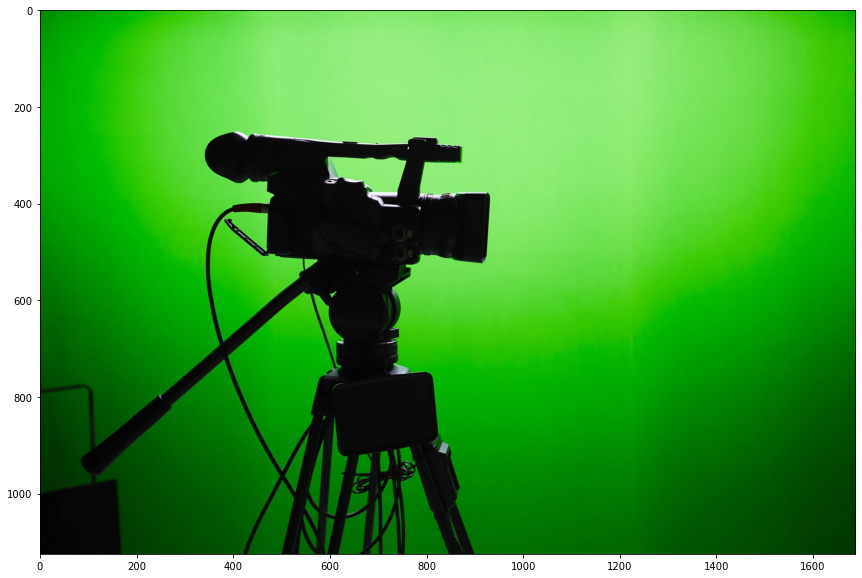

In [534]:
rgb_img= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)            

plt.figure(figsize= (15, 10))
plt.imshow(rgb_img)

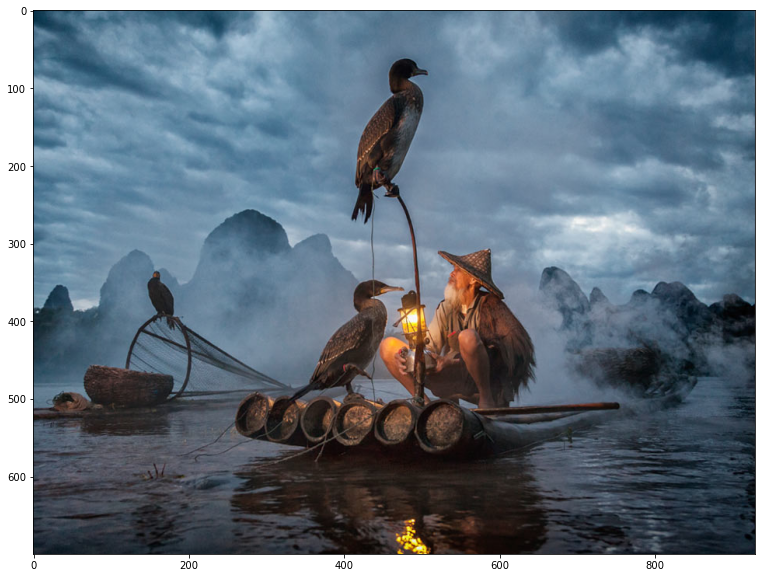

In [535]:
rgb_img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)            

plt.figure(figsize= (15, 10))
plt.imshow(rgb_img2)

In [536]:
rgb_img = cv2.resize(rgb_img, (640, 480))
rgb_img2 = cv2.resize(rgb_img2, (640, 480))

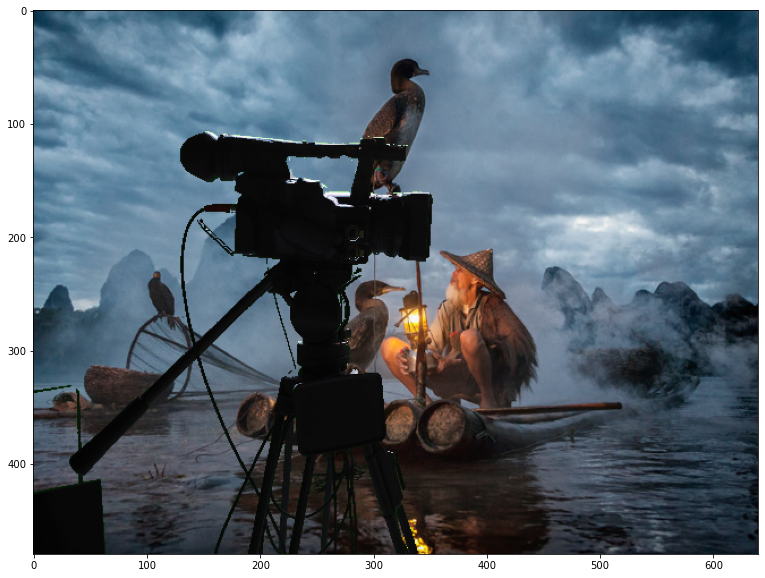

In [537]:
lower_green = np.array([0, 40, 0]) 
upper_green = np.array([160, 255, 190])

mask = cv2.inRange(rgb_img, lower_green, upper_green)

rgb_img[mask != 0] = [0,0,0]
rgb_img2[mask == 0] = [0,0,0]

merged = cv2.add(rgb_img, rgb_img2)

plt.figure(figsize = (15, 10))
plt.imshow(merged)

# Add or blend

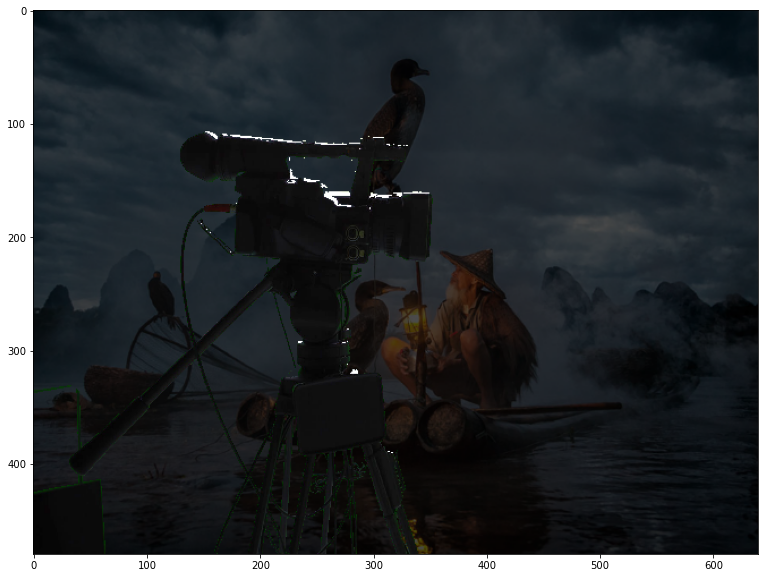

In [538]:
# add or blend the images
dst = cv2.addWeighted(rgb_img, 1.5, rgb_img2, 0.3, 0)
plt.figure(figsize=(15 ,10))
plt.imshow(dst)

# Another type for Green screen

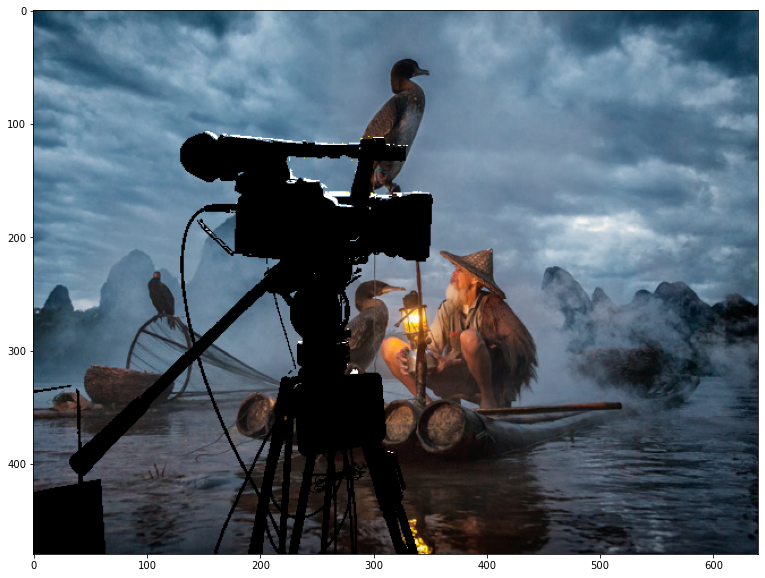

In [539]:
retval, dst = cv2.threshold(rgb_img, thresh = 153, maxval = 255, type = cv2.THRESH_BINARY)
rgb_img = cv2.multiply(dst, rgb_img)
rgb_img2 = cv2.multiply(1 - dst, rgb_img2)
merged = cv2.add(rgb_img, rgb_img2)

plt.figure(figsize = (15, 10))
plt.imshow(merged)


# Blur hole image

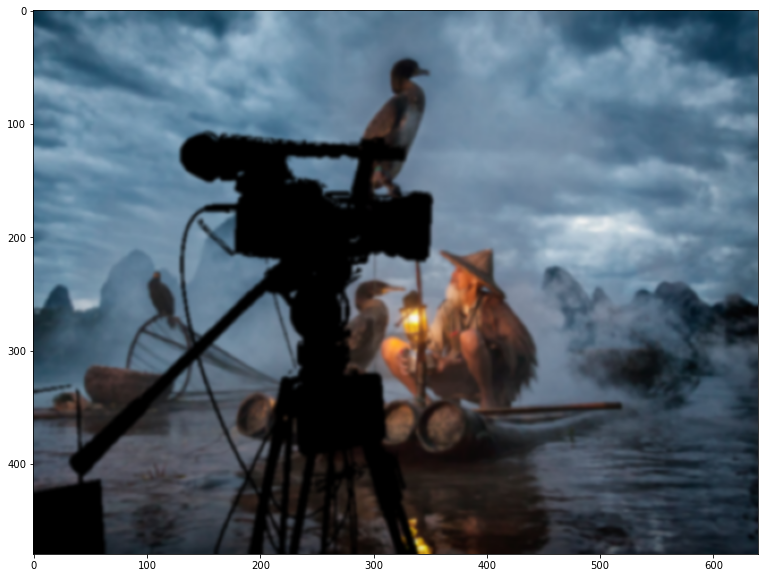

In [540]:
blur = cv2.GaussianBlur(rgb_img2, (7, 7), 0)
plt.figure(figsize = (15, 10))
plt.imshow(blur)

In [541]:
import cv2
import numpy as np


video = cv2.VideoCapture("image\breaking-news-news.gif")
image = cv2.imread("image\Fotolia_94207102_Subscription_Monthly_M.jpg")

while True:

    ret, frame = video.read()

    frame = cv2.resize(frame, (640, 480))
    image = cv2.resize(image, (640, 480))

    u_green = np.array([104, 153, 70])
    l_green = np.array([30, 30, 0])

    mask = cv2.inRange(frame, l_green, u_green)
    res = cv2.bitwise_and(frame, frame, mask=mask)

    f = frame - res
    f = np.where(f == 0, f, image)

    cv2.imshow("video", frame)
    cv2.imshow("mask", f)

    if cv2.waitKey(25) == 27:
        break

video.release()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
